In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import PIL
import PIL.Image
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist, cifar10

In [3]:
# https://www.tensorflow.org/tutorials/load_data/images
import pathlib
data_dir = pathlib.Path('train/')
val_data_dir = pathlib.Path('test/')

In [4]:
image_count = len(list(data_dir.rglob('*/*.jpg')))
print(image_count)

4244


In [5]:
images = list(data_dir.rglob('*/*.jpg'))
images[0]

WindowsPath('train/hotdog/1.jpg')

In [6]:
hotdog = list(data_dir.glob('hotdog/*.jpg'))
nothotdog = list(data_dir.glob('nothotdog/*.jpg'))

In [7]:
im = PIL.Image.open(str(hotdog[0]))
np.asarray(im).shape

(299, 299, 3)

In [8]:
import numpy as np
from PIL import Image

def load_images_from_directory(filenames):
    img_height = 180
    img_width = 180

    images = []
    for file in filenames:
        image = Image.open(file)
        image = image.resize((img_width, img_height), Image.Resampling.LANCZOS)
        images.append(np.array(image))
    return np.array(images)

In [9]:
xtrain_hotdog = load_images_from_directory(hotdog)
len(xtrain_hotdog)

2121

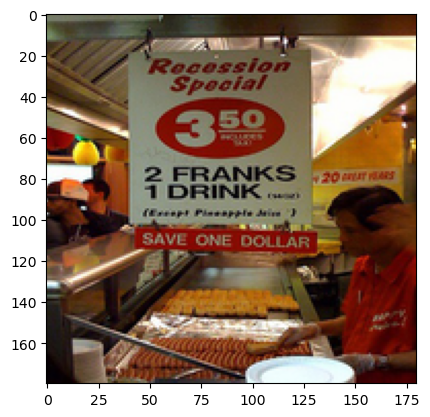

In [10]:
plt.imshow(xtrain_hotdog[0])

In [11]:
xtrain_hotdog[0].shape

(180, 180, 3)

In [12]:
ytrain_hotdog = np.ones(len(xtrain_hotdog), dtype = np.int8)

In [14]:
xtrain_not_hotdog = load_images_from_directory(nothotdog)
len(xtrain_not_hotdog)

2121

In [15]:
ytrain_nothotdog = np.zeros(len(xtrain_not_hotdog), dtype = np.int8)

In [16]:
X = np.concatenate([xtrain_hotdog, xtrain_not_hotdog])

In [17]:
X = np.stack(X)
X.shape

(4242, 180, 180, 3)

In [18]:
y = np.concatenate([ytrain_hotdog, ytrain_nothotdog])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 2024)

In [33]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape = (180, 180, 3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(10, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │     1,183,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,202,762 (4.59 MB)

 Trainable params: 1,202,762 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(
    loss='sparse_categorical_crossentropy',  
    optimizer='rmsprop',
    metrics=['acc']
)

In [36]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size = 16,
    epochs = 10
)

Epoch 1/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 32s 230ms/step - acc: 0.5218 - loss: 72.2346 - val_acc: 0.5582 - val_loss: 1.1484
Epoch 2/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 27s 204ms/step - acc: 0.6475 - loss: 1.7952 - val_acc: 0.5342 - val_loss: 7.3787
Epoch 3/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 33s 250ms/step - acc: 0.7746 - loss: 2.6150 - val_acc: 0.5521 - val_loss: 2.0112
Epoch 4/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 26s 198ms/step - acc: 0.8570 - loss: 1.1959 - val_acc: 0.5794 - val_loss: 2.3086
Epoch 5/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 24s 179ms/step - acc: 0.8604 - loss: 3.7444 - val_acc: 0.5738 - val_loss: 5.5079
Epoch 6/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 29s 220ms/step - acc: 0.9211 - loss: 0.9720 - val_acc: 0.5658 - val_loss: 4.0418
Epoch 7/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 39s 295ms/step - acc: 0.9231 - loss: 0.8939 - val_acc: 0.5879 - val_loss: 4.2644
Epoch 8/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 24s 177ms/step - acc: 0.9366 - loss: 2.4096 - val_acc: 0.5733 - val_loss: 6.5281
Epoch 9/10
133/133 ━━━━━━━━━━━━

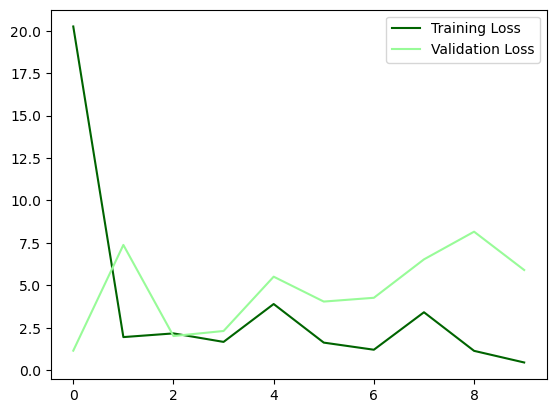

In [67]:
plt.plot(history.history['loss'], c='darkgreen', label='Training Loss')
plt.plot(history.history['val_loss'], c='palegreen', label='Validation Loss')
plt.legend();

In [68]:
model.evaluate(X_test, y_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - acc: 0.5652 - loss: 5.7962


[5.881974697113037, 0.5553984045982361]

In [79]:
 preds = model.predict(X_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step


In [82]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [83]:
y_test

array([0, 1, 0, ..., 1, 0, 1], dtype=int8)

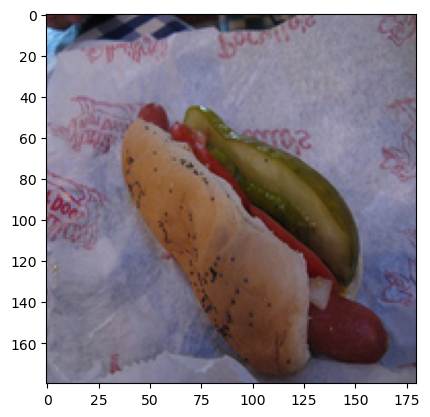

We thought = 0, but really 1


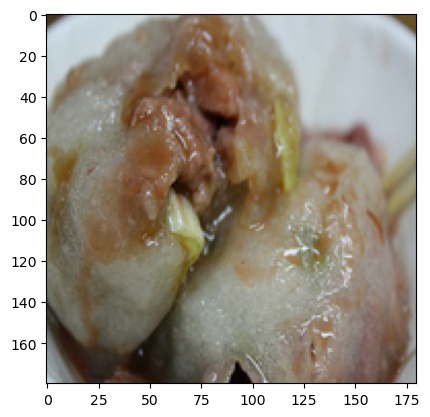

We thought = 1, but really 0


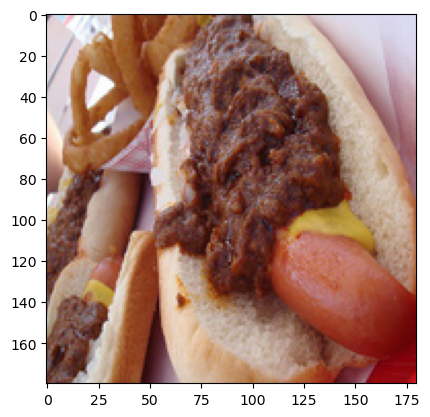

We thought = 0, but really 1


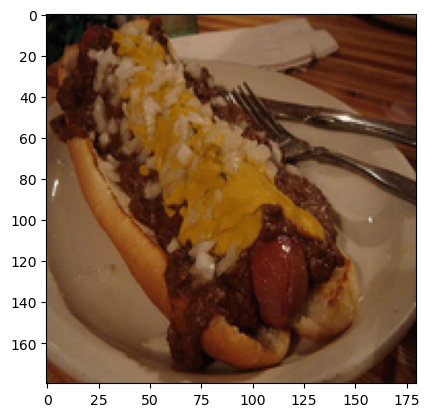

We thought = 0, but really 1


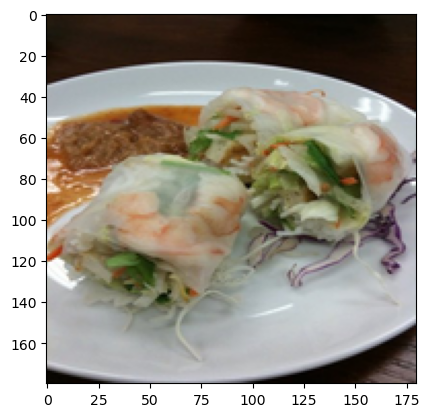

We thought = 1, but really 0


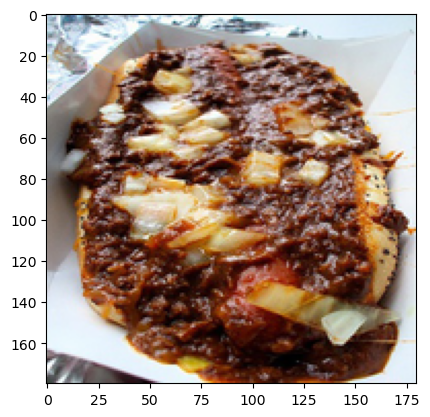

We thought = 0, but really 1


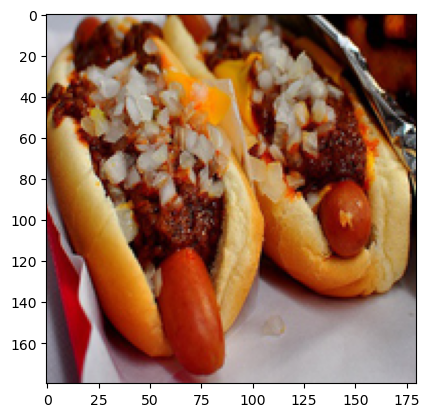

We thought = 0, but really 1


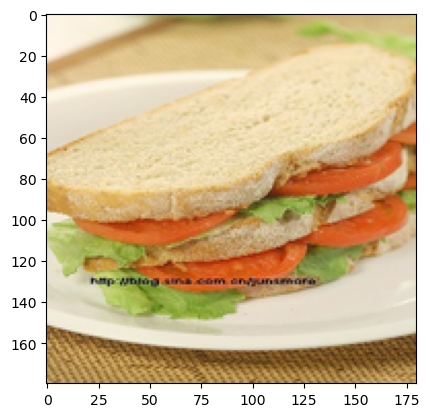

We thought = 0, but really 1


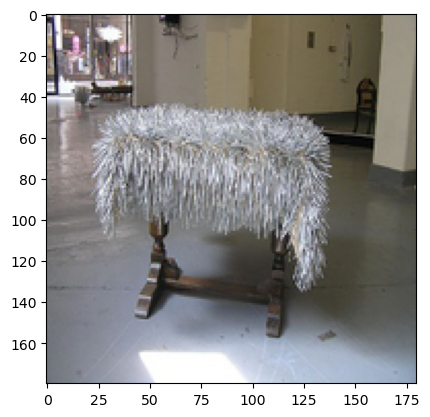

We thought = 1, but really 0


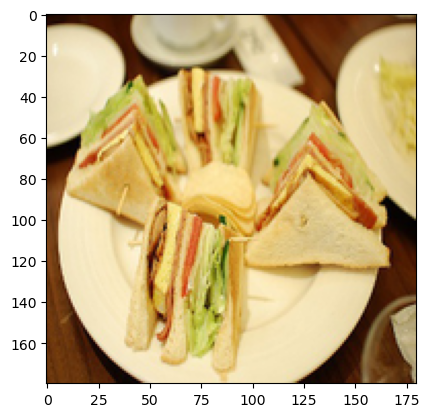

We thought = 1, but really 0


In [84]:
wrong_ix = np.where(y_pred != y_test)[0]
for i in wrong_ix[:10]:
    plt.clf()
    plt.imshow(X_test[i])
    plt.show()
    pred = y_pred[i]
    truth = y_test[i]
    print(f'We thought = {pred}, but really {truth}')

In [25]:
model.save('model.h5')

In [46]:
# import pickle as 
# model.save_weights('model.weights.h5')

In [48]:
# with open('modelarchitechture.pk1', 'wb') as f:
#     pickle.dump(model.to_json(),f)

In [64]:
with open('modelarchitechture.pk1', 'rb') as f:
    architechture = pickle.load(f)

In [65]:
import tensorflow as tf
m = tf.keras.models.model_from_json(architechture)

In [71]:
m.load_weights('model.weights.h5')

67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step
